# Laboratorio 10

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report

%matplotlib inline

In [2]:
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
target_names = breast_cancer.target_names

## Ejercicio 1

(1 pto.)

Ajusta una regresión logística a los datos de entrenamiento y obtén el _accuracy_ con los datos de test. Utiliza el argumento `n_jobs` igual a $-1$, si aún así no converge aumenta el valor de `max_iter`.

Hint: Recuerda que el _accuracy_ es el _score_ por defecto en los modelos de clasificación de scikit-learn.

In [3]:
from sklearn.metrics import accuracy_score
lr = LogisticRegression(n_jobs=-1, max_iter=1800)
lr.fit(X_train,y_train)
print(f"Logistic Regression accuracy: {lr.score(X_test,y_test)}")

Logistic Regression accuracy: 0.9707602339181286


## Ejercicio 2

(1 pto.)

Utiliza `GridSearchCV` con 5 _folds_ para encontrar el mejor valor de `n_neighbors` de un modelo KNN.

In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
knn = KNeighborsClassifier()
knn_grid = {"n_neighbors": np.arange(2, 31)}

knn_cv = GridSearchCV(
    estimator=knn,
    param_grid=knn_grid,
    cv=5
)

knn_cv.fit(X_train, y_train)
knn_cv.best_params_

{'n_neighbors': 8}

In [6]:
print(f"KNN accuracy: {knn_cv.score(X_test, y_test)}")

KNN accuracy: 0.9649122807017544


## Ejercicio 3

(1 pto.)

¿Cuál modelo escogerías basándote en los resultados anteriores? Justifica

__Respuesta:__ Debido al score (accuracy) obtenido en cada modelo, el modelo elegido es la regresión logística, al poseer un accuracy de 0.97, el cual es mayor al accuracy del modelo kNN (0.96). Aun así, es importante tener en cuenta la cantidad de iteraciones para que el modelo converga. Por ejemplo, con 100 iteraciones no converge, pero si con 1000.

## Ejercicio 4

(1 pto.)

Para el modelo seleccionado en el ejercicio anterior.

* Grafica la matriz de confusión (no olvides colocar los nombres originales en los _labels_).
* Imprime el reporte de clasificación.

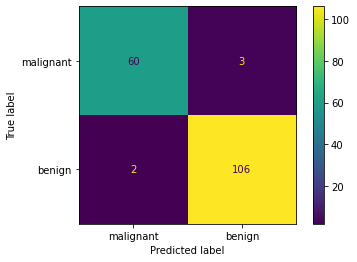

In [7]:
plot_confusion_matrix(lr, X_test, y_test, display_labels=target_names)
plt.show()

In [8]:
y_pred=lr.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   malignant       0.97      0.95      0.96        63
      benign       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

